In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing Face Mask Detaset**

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 94% 153M/163M [00:01<00:00, 130MB/s]
100% 163M/163M [00:01<00:00, 123MB/s]


In [4]:
# extracting the compessed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dpendencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2291.jpg', 'with_mask_2105.jpg', 'with_mask_3603.jpg', 'with_mask_533.jpg', 'with_mask_2005.jpg']
['with_mask_2676.jpg', 'with_mask_1074.jpg', 'with_mask_662.jpg', 'with_mask_2637.jpg', 'with_mask_1013.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2043.jpg', 'without_mask_3414.jpg', 'without_mask_1940.jpg', 'without_mask_3631.jpg', 'without_mask_2640.jpg']
['without_mask_2251.jpg', 'without_mask_1422.jpg', 'without_mask_2920.jpg', 'without_mask_1802.jpg', 'without_mask_3746.jpg']


In [9]:
print('number of mask images:', len(with_mask_files))
print('number of without mask images:', len(without_mask_files))

number of mask images: 3725
number of without mask images: 3828


**Creating Labels for the two class of images**

1.   with mask --> 1
2.   without mask --> 0



In [11]:
# create the labels

with_mask_label = [1]*3725
without_mask_label = [0]*3828

print(with_mask_label[0:5])

print(without_mask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_label))
print(len(without_mask_label))

3725
3828


In [13]:
labels = with_mask_label + without_mask_label

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the images**

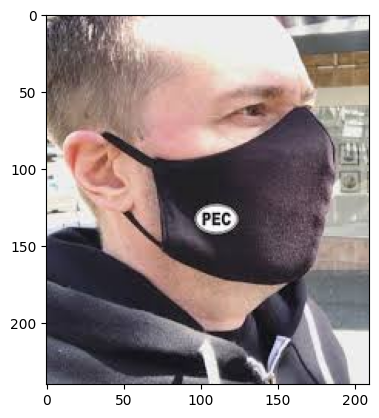

In [15]:
# displaying with mask image

img = mpimg.imread('/content/data/with_mask/with_mask_2637.jpg')
imgplot  = plt.imshow(img)
plt.show()

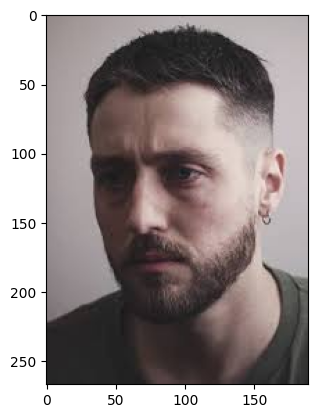

In [16]:
# displaying with mask image

img = mpimg.imread('/content/data/without_mask/without_mask_3414.jpg')
imgplot  = plt.imshow(img)
plt.show()